## Adding a category to capture NA

This is perhaps the most widely used method of missing data imputation for categorical variables. This method consists in treating missing data as if they were an additional label or category of the variable. All the missing observations are grouped in the newly created label 'Missing'. 

The beauty of this technique resides on the fact that it does not assume anything on the missingness of the values. It is very well suited when the number of missing data is high.


### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

### Disadvantages

- If the number of NA is small, creating an additional category may cause trees to over-fit

I would say that for categorical variables this is the method of choice, as it treats missing values as a separate category, without making any assumption on their missingness. It is used widely in data science competitions and business settings. See for example the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).


===============================================================================

## Real Life example: 

### Predicting Sale Price of Houses

The problem at hand aims to predict the final sale price of homes based on different explanatory variables describing aspects of residential homes. Predicting house prices is useful to identify fruitful investments, or to determine whether the price advertised for a house is over or underestimated, before making a buying judgment.

=============================================================================

In the following cells, I will demonstrate NA imputation by adding an additional label using the House Price datasets from Kaggle.

If you haven't downloaded the datasets yet, in the lecture "Guide to setting up your computer" in section 1, you can find the details on how to do so.

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# for regression problems
from sklearn.linear_model import LinearRegression, Ridge

# to split and standarize the datasets
from sklearn.model_selection import train_test_split

# to evaluate regression models
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### House Price dataset

In [15]:
%cd ../data_set/
# let's load the dataset with a few columns for the demonstration
cols_to_use = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice']

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)

# let's inspect the percentage of missing values in each variable
data.isnull().mean().sort_values(ascending=True)

/home/pat/Desktop/Udemy_FeatureEngineering/data_set


SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [16]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[['BsmtQual', 'FireplaceQu', 'GarageType']],
                                                    data.SalePrice, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [17]:
# let's create a variable to replace NA with the most frequent label or a random sample

def impute_na(df_train, df_test, variable):
    df_train[variable+'_NA'] = np.where(df_train[variable].isnull(), 'Missing', df_train[variable])
    df_test[variable+'_NA'] = np.where(df_test[variable].isnull(), 'Missing', df_test[variable])

In [18]:
# and let's replace the NA
for variable in ['BsmtQual', 'FireplaceQu', 'GarageType',]:
    impute_na(X_train, X_test, variable)

In [19]:
# let's check that data have been completed
X_train.isnull().sum()

BsmtQual           24
FireplaceQu       478
GarageType         54
BsmtQual_NA         0
FireplaceQu_NA      0
GarageType_NA       0
dtype: int64

In [22]:
# let's see how the new variable looks like, where data was missing we have
# not the label 'Missing'

X_train.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQual_NA,FireplaceQu_NA,GarageType_NA
64,Gd,NaN,Attchd,Gd,Missing,Attchd
682,Gd,Gd,Attchd,Gd,Gd,Attchd
960,TA,NaN,NaN,TA,Missing,Missing
1384,TA,NaN,Detchd,TA,Missing,Detchd
1100,TA,NaN,Detchd,TA,Missing,Detchd


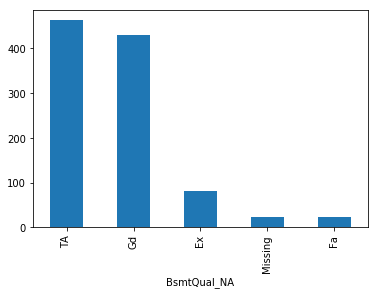

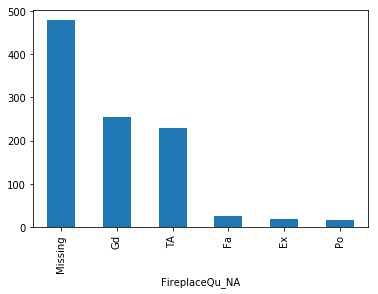

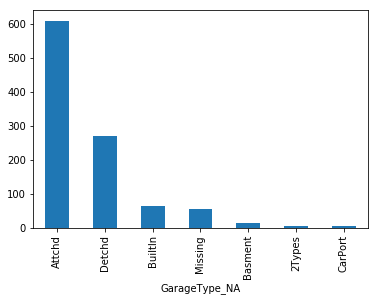

In [23]:
# let's look at the number of observations per label on each of the variables
for col in ['BsmtQual_NA', 'FireplaceQu_NA', 'GarageType_NA']:
    X_train.groupby([col])[col].count().sort_values(ascending=False).plot.bar()
    plt.show()

We observe in the plots the label indicating the number of observations with missing values, within each of the 3 categorical variables.

In [24]:
# let's transform the categories into numbers quick and dirty so we can use them in scikit-learn

# the below function numbers the labels from 0 to n, n being the number of different labels 
#  within the variable

for col in ['BsmtQual_NA', 'FireplaceQu_NA', 'GarageType_NA',]:
    labels_dict = {k:i for i, k in enumerate(X_train[col].unique(), 0)}
    X_train.loc[:, col] = X_train.loc[:, col].map(labels_dict )
    X_test.loc[:, col] = X_test.loc[:, col].map(labels_dict)

### Linear Regression

In [26]:
# Let's evaluate the performance of Linear Regression

linreg = LinearRegression()
linreg.fit(X_train[['BsmtQual_NA', 'FireplaceQu_NA', 'GarageType_NA',]], y_train)
print('Train set random imputation')
pred = linreg.predict(X_train[['BsmtQual_NA', 'FireplaceQu_NA', 'GarageType_NA',]])
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
print('Test set random imputation')
pred = linreg.predict(X_test[['BsmtQual_NA', 'FireplaceQu_NA', 'GarageType_NA',]])
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))

Train set random imputation
Linear Regression mse: 4810016310.466396
Test set random imputation
Linear Regression mse: 5562566516.826057


In the previous lectures we trained linear regressions on data where missing observations were replaced by i) random sampling, or ii) random sampling plus a variable to indicate missingness. We obtained the following mse for the testing sets:

- frequent label imputation mse: 6456070592
- random sampling + additional category: 4911877327
- adding 'missing' label: 5562566516

Therefore, adding an additional 'Missing' category lies between the 2 other approaches in terms of performance.

A next step could be to investigate which approach works better for each variable individually, to try and optimise the performance of logistic regression even more.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**